Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Clean continuous variables
1. Filling missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`PassengerId`,`SibSp`, `Parch`)

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<Figure size 432x288 with 0 Axes>

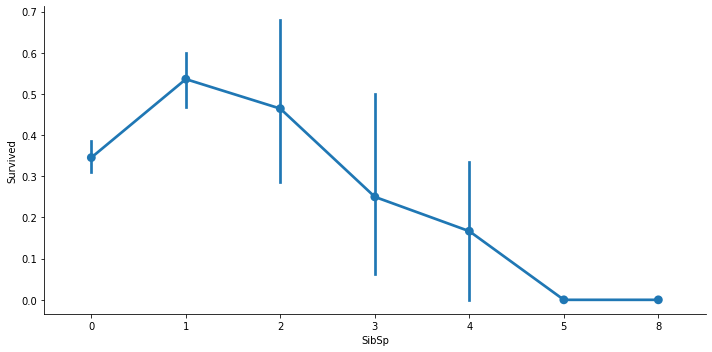

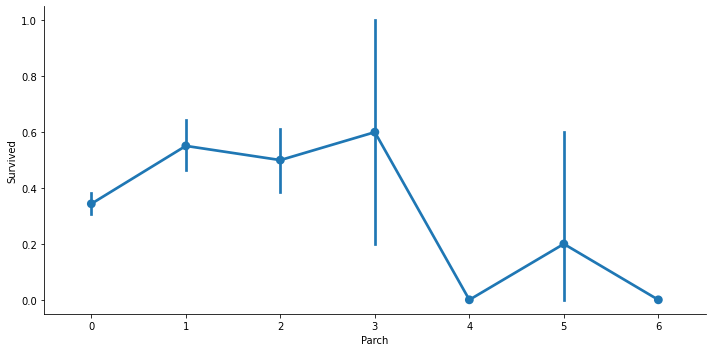

In [5]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=2)

In [6]:
df['Family_cnt'] = df['SibSp'] + df['Parch']

#### Drop unnnecessary variables

In [7]:
df.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [8]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


### Clean categorical variables
1. Create an indicator variable in place of `Cabin`
2. Convert `Sex` to a numeric variable
3. Drop irrelevant/repetitive variables (`Cabin`, `Embarked`, `Name`, `Ticket`)

#### Create indicator for `Cabin`

In [9]:
df['Cabin_ind'] = np.where(df['Cabin'].isnull(), 0, 1)

#### Convert `Sex` to numeric

In [10]:
gender_num = {'male': 0, 'female': 1}

df['Sex'] = df['Sex'].map(gender_num)

#### Drop unnecessary variables

In [11]:
df.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

### Fit and evaluate model using 5-fold Cross-Validation

In [16]:
RF = RandomForestClassifier()

scores = cross_val_score(RF, X_train, y_train.values.ravel(), cv=5)
print(scores)

[0.8317757  0.82242991 0.79439252 0.81308411 0.82075472]


In [17]:
DT = DecisionTreeClassifier()

scores = cross_val_score(DT, X_train, y_train.values.ravel(), cv=5)
print(scores)

[0.76635514 0.75700935 0.79439252 0.73831776 0.77358491]


## Tune hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [22]:
parameters = {
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [2, 10, 15, 20, None]
}

cv = GridSearchCV(RF, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.775 (+/-0.143) for {'max_depth': 2, 'n_estimators': 5}
0.775 (+/-0.154) for {'max_depth': 2, 'n_estimators': 10}
0.79 (+/-0.111) for {'max_depth': 2, 'n_estimators': 50}
0.794 (+/-0.119) for {'max_depth': 2, 'n_estimators': 100}
0.798 (+/-0.091) for {'max_depth': 10, 'n_estimators': 5}
0.817 (+/-0.06) for {'max_depth': 10, 'n_estimators': 10}
0.813 (+/-0.057) for {'max_depth': 10, 'n_estimators': 50}
0.828 (+/-0.049) for {'max_depth': 10, 'n_estimators': 100}
0.801 (+/-0.026) for {'max_depth': 15, 'n_estimators': 5}
0.82 (+/-0.052) for {'max_depth': 15, 'n_estimators': 10}
0.815 (+/-0.027) for {'max_depth': 15, 'n_estimators': 50}
0.811 (+/-0.047) for {'max_depth': 15, 'n_estimators': 100}
0.794 (+/-0.047) for {'max_depth': 20, 'n_estimators': 5}
0.807 (+/-0.022) for {'max_depth': 20, 'n_estimators': 10}
0.802 (+/-0.029) for {'max_depth': 20, 'n_estimators': 50}
0.805 (+/-0.031) for {'max_depth': 20, 'n_estimators': 100}
0.79 (+/-0

### Fit best models on full training set

In [23]:
RF1 = RandomForestClassifier(n_estimators=50, max_depth=None)
RF1.fit(X_train, y_train.values.ravel())

RF2 = RandomForestClassifier(n_estimators=100, max_depth=10)
RF2.fit(X_train, y_train.values.ravel())

RF3 = RandomForestClassifier(n_estimators=10, max_depth=15)
RF3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=15, n_estimators=10)

### Evaluate models on validation set

In [24]:
for mdl in [RF1, RF2, RF3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: None / # OF EST: 50 -- A: 0.804 / P: 0.797 / R: 0.724
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.832 / P: 0.859 / R: 0.724
MAX DEPTH: 15 / # OF EST: 10 -- A: 0.821 / P: 0.806 / R: 0.763


### Evaluate the best model on the test set

In [25]:
y_pred = RF2.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(RF2.max_depth,
                                                                     RF2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.809 / P: 0.782 / R: 0.662
